In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import sys

from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm


plt.rcParams["figure.figsize"] = (20, 16)
warnings.simplefilter("ignore")

sys.path.append("../1_Format_donnees/")
from aggregation import load_and_preprocess_agg_metrics, Scaler_Metrics
sys.path.append("../")

from evaluate import plot_confusion_matrix

### <8 mbits en cumsum = bruit 

In [2]:
df_train = load_and_preprocess_agg_metrics("../Mesures/train")

Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 86.64it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 54.53it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|█████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 119.90it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 16.31it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.43it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.26it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.32it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|███████████████████████████████████████████████████████████████████████████████| 805/805 [00:01<00:00, 753.28it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.56it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 40.16it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.45it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 51.00it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 39.16it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.58it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 12.31it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|█████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:02<00:00, 733.07it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|███████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 810.53it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|███████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 732.80it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 125.84it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72.84it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 93.98it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 139.08it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 349.72it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 534.50it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39
Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 344.59it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


  0%|                                                                                           | 0/92 [00:00<?, ?it/s]

Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 746.91it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 870.74it/s]

Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39



  0%|                                                                                           | 0/90 [00:00<?, ?it/s]

Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 724.75it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 480.20it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 556.89it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 473.07it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 580.02it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 325.95it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 250.53it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


100%|██████████████████████████████████████████████████████████████████████████████| 5593/5593 [01:05<00:00, 85.30it/s]


In [3]:
df_test = load_and_preprocess_agg_metrics("../Mesures/test")

Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 25.62it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  8.97it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.21it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 370.31it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 28.76it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 679.90it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


100%|████████████████████████████████████████████████████████████████████████████████| 765/765 [00:15<00:00, 47.96it/s]


In [9]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)
training_data

id
20221124_151137_4      messenger
20221124_151137_5      messenger
20221124_151137_6      messenger
20221124_151137_7      messenger
20221124_151137_8      messenger
                         ...    
20230117_121925_259      youtube
20230117_121925_260      youtube
20230117_121925_261      youtube
20230117_121925_262      youtube
20230117_121925_263      youtube
Name: label, Length: 765, dtype: object


,reg_lin_R2_TBS_1,reg_lin_coef_A_TBS_1,reg_lin_R2_TBS_2,reg_lin_coef_A_TBS_2,p0_TBS_1,p10_TBS_1,p25_TBS_1,p50_TBS_1,p75_TBS_1,p90_TBS_1,...,p0_TBS_2,p10_TBS_2,p25_TBS_2,p50_TBS_2,p75_TBS_2,p90_TBS_2,p100_TBS_2,mean_TBS_2,std_TBS_2,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4,1.409140,1.449940,0.402351,-0.101627,0.138751,0.217813,-0.124111,-0.073277,0.716816,0.662753,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,1.335680,-0.268988,-0.233816,messenger
20221117_125310_5,1.062412,-0.215354,0.440589,-0.107149,0.067866,-0.375499,-0.228940,-0.238736,-0.415108,-0.586022,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.341449,-0.272448,-0.305047,messenger
20221117_125310_6,1.057756,-0.037047,0.440589,-0.107149,0.067866,-0.375499,-0.228940,-0.221619,-0.406310,-0.586022,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.341449,-0.272448,-0.305047,messenger
20221117_125310_8,1.402432,1.438787,0.440589,-0.107149,-0.038462,0.217813,-0.054225,-0.004812,0.763735,0.610035,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.341449,-0.272448,-0.305047,messenger
20221117_125310_7,1.403831,1.176822,-1.580600,-0.101637,0.067866,0.217813,-0.054225,0.006599,0.411842,0.482851,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.084867,-0.269149,-0.262006,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_162,-1.932830,0.718301,0.440589,-0.107149,-0.073905,1.150162,0.452448,0.679843,0.048219,-0.348787,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.341449,-0.272448,-0.305047,youtube
20230124_124323_163,-1.544225,5.412745,0.440589,-0.107149,-0.073905,0.217813,-0.124111,4.730719,2.130255,0.820910,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.341449,-0.272448,-0.305047,youtube
20230124_124323_164,-1.721674,1.152697,0.440589,-0.107149,-0.073905,1.150162,0.452448,0.679843,0.048219,0.610035,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.341449,-0.272448,-0.305047,youtube


In [10]:
training_data = training_data[training_data .label!="noise"]
testing_data = testing_data[testing_data .label!="noise"]

In [12]:
model = RandomForestClassifier()
model.fit(training_data[training_data.columns[:-1]], training_data.label)

RandomForestClassifier()

In [13]:
# mesure efficiency
preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label

normalized confusion matrix


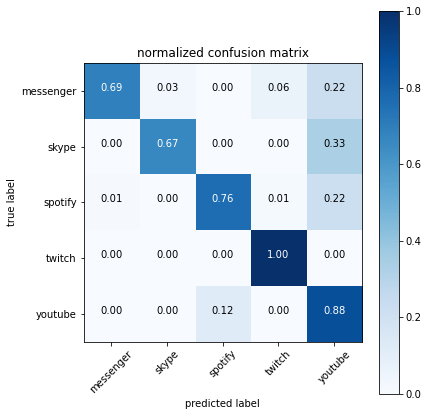

In [14]:
plot_confusion_matrix(true_labels,preds_labels)